# "Likelihood"
> "To understand Likelihood of distributions"

- toc: false
- author: Deebul Nair
- branch: master
- badges: true
- comments: true
- categories: [probability, python]

# What is Likelihood?

Likelihood and probablity seems to be same word in the layman domain, but in the stats domain they are different.

In the stats domain the likelihood or likelihood function is a **measurement**. It measures the distance between a **statistical model** and the **input data**.

What is a statistical model?
> The diferent probability distributions available. For example, Gausian, gama, beta distribution, exponential for continuous data while Bernoulli, Dirichlet, multinomila distributions for discrete data.

How are statistical models represented?
> By their parameters. For example for gaussian distribution the parameters are $\mu$ and $\sigma$ .

How do we select the statictical model?
> Depends on  many factors. This is the main decision to be made while designing a statistical model based learning. The different factors include:
* what is the data type: Continuous or discrete?
* Is it symmetrical or asymetrical?
* Domain of the data, binary, real, etc
* Does it decay or increase?
* . . . etc

A complete knowledge about the type data and the type of distribution is required to make the appropriate decision.


## Good blog on likelihood with scipy.stats
* https://www.kaggle.com/code/tentotheminus9/so-you-have-a-diagnostic-test-result/notebook 

## Common Probability distribution 

| Data Type | Domain | Distribution | Python (numpy.random) | Parameters |
|-----------|--------|--------------|--------|----------|
|univariate, discrete, <br>binary | $$ x\in\{0,1\} $$ | Bernoulli | binomial(1, p)| $$ p\in[0,1]$$|
|univariate, discrete, <br> multivalued | $$ x \in \{ 1,2, \dots, K\}$$| multinomial | multinomial(n, pvals) | $$pvals = [p_1, \dots , p_k] $$ <br> $$ \sum_{i=1}^{K} p_i = 1 $$ |
|univariate, continuous, <br> unbounded | $$ x \in \mathbb{R} $$ | normal | normal(mu, sigma)|$$ \mu \in \mathbb{R} $$ <br> $$ \sigma \in \mathbb{R}$$

In [0]:
#Lets make some distributions and find the likelihood to some data
import numpy as np
import matplotlib.pyplot as plt

number_of_samples = 20;
#parameters ; sample data from distribution (continuous data)
mu, sigma = 12, 0.1     ; univariate_gaussian_samples = np.random.normal(mu, sigma, number_of_samples)
mean = [0, 0]; 
cov = [[1, 0], [0, 100]]; multivariate_gaussian_samples = np.random.multivariate_normal(mean, cov, number_of_samples)

#parameters ; sample data from distribution (discreta data)
p = 0.8                 ; bernoulli_samples = np.random.binomial(1, p, number_of_samples)
pvals = [0.2, 0.6, 0.2] ; multinomial_samples = np.random.multinomial(number_of_samples, pvals)
alpha, beta = 10, 20    ; beta_samples = np.random.beta(alpha, beta, number_of_samples)
alpha = [10,20,10,90]   ; dirchilet_samples = np.random.dirichlet(alpha, number_of_samples)

## Goal of Likelihood

The goal of likelihood would be given the samples as shown above (beta_samples, dirichlet_samples etc) find the parameters of the corresponding distribution ((alpha, beta), alphas respectively)


### Lets look into this process in the comming post

In [0]:
#hide
def normal_likelihood(data, mean, sigma):
    s = (data - mean) ** 2 / (2 * (sigma ** 2))
    pdfs = np.exp(- s)
    pdfs /= np.sqrt(2 * np.pi) * sigma
    return pdfs.sum()
normal_likelihood(data, mu, sigma)

53.103040406762

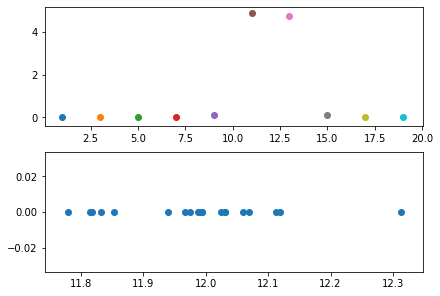

In [0]:
#hide
sigma = 1
fig, axs = plt.subplots(nrows=2, ncols=1, constrained_layout=True)
axs[1].scatter(data, np.zeros(len(data)))
for mu in range(1,20,2):
  ll = normal_likelihood(data, mu, sigma)
  axs[0].scatter(mu, ll)



#hide
### Bernoulli Distribution
Let $x$ be the *count* of data points with value 1 and $y$ be the *count* of data points with value 0.
$$ Pr(x) = \lambda^{x}(1 - \lambda^{y}) $$

In [0]:
#hide
p = 0.6
data = np.random.binomial(1, p, 200)
#data

In [0]:
#hide
def bernoulli_likelihood(data, p):
  x = np.count_nonzero(data)
  return ((p**(x)) * (1 - p)**(len(data) - x))

bernoulli_likelihood(data, p)

1.0343691877490352e-59

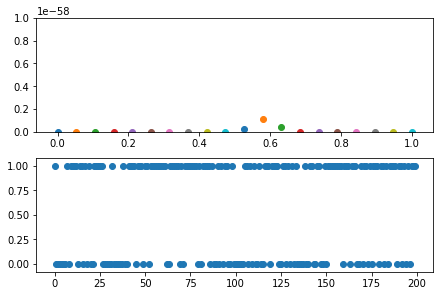

In [0]:
#hide
fig, axs = plt.subplots(nrows=2, ncols=1, constrained_layout=True)

axs[1].scatter(range(len(data)), data)
for p in np.linspace(0,1, num=20):
  ll = bernoulli_likelihood(data, p)
  axs[0].scatter(p, ll)
  axs[0].set_ylim([0, 1e-58])

In [0]:
#hide